In [1]:
using Revise

using RealNeuralNetworks
using RealNeuralNetworks.Neurons
using RealNeuralNetworks.SWCs
using RealNeuralNetworks.Neurons.Segments
using Plots
Plots.plotly()

import Pkg
include(joinpath(Pkg.dir("RealNeuralNetworks"), "src/Utils/PlotRecipes.jl"))
using .PlotRecipes

┌ Info: Precompiling Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1278
┌ Info: Precompiling RealNeuralNetworks [4491297b-8966-5840-8cb9-b189d60f3398]
└ @ Base loading.jl:1278
┌ Warning: did not find AWS credential! set it in environment variables.
└ @ BigArrays.S3Dicts ~/.julia/dev/BigArrays/src/backends/S3Dicts.jl:23
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Info: Precompiling ORCA [47be7bcc-f1a6-5447-8b36-7eeeff7534fd]
└ @ Base loading.jl:1278
┌ Warning: ORCA.jl has been deprecated and all savefig functionality
│ has been implemented directly in PlotlyBase itself.
│ 
│ By implementing in PlotlyBase.jl, the savefig routines are automatically
│ available to PlotlyJS.jl also.
└ @ ORCA /Users/jwu/.julia/packages/ORCA/U5XaN/src/ORCA.jl:8
┌ Warning: `Pkg.dir(pkgname, paths...)` is deprecated; instead, do `import RealNeuralNetworks; joinpath(dirname(pathof(RealNeuralNetworks)), "..", paths...)`.
└ @ Pkg /Users/julia/bui

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-18420112992724841296\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8429732213224971586\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-18420112992724841296\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-3373846194004531267\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2095661569110270278\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-3373846194004531267\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1278


In [2]:
#cellId = 76390
#  cellId = 76749
# cellId = 76627
#cellId = 76560
#cellId = 77151
#cellId = 76564
cellId = 77710

swc = SWCs.load_swc_bin("../01_data/postprocessed_swc_bin/$(cellId).swc.bin")
neuron = Neuron(swc)
neuron = Neurons.remove_hair(neuron)
neuron = Neurons.remove_subtree_in_soma(neuron)
neuron = Neurons.remove_terminal_blobs(neuron)
neuron = Neurons.remove_redundent_nodes(neuron)

segmentList = Neurons.get_segment_list( neuron )

49-element Array{Segment{Float32},1}:
 Segment{Float32}(NTuple{4,Float32}[(293800.0, 125040.0, 807075.0, 1382.9038), (293800.0, 125000.0, 807075.0, 1378.5166), (293760.0, 124960.0, 807075.0, 1362.7328), (293760.0, 124920.0, 807075.0, 1363.3676), (293760.0, 124880.0, 807075.0, 1362.0975), (293760.0, 124840.0, 807075.0, 1347.4064), (293760.0, 124840.0, 807030.0, 1332.5531), (293760.0, 124840.0, 806985.0, 1318.8453), (293760.0, 124840.0, 806940.0, 1306.3191), (293760.0, 124800.0, 806940.0, 1292.3331)  …  (293760.0, 124560.0, 806310.0, 1192.0168), (293760.0, 124520.0, 806265.0, 1189.837), (293760.0, 124520.0, 806220.0, 1201.4172), (293760.0, 124520.0, 806175.0, 1196.3647), (293760.0, 124480.0, 806130.0, 1210.0297), (293760.0, 124480.0, 806085.0, 1215.7373), (293760.0, 124440.0, 806040.0, 1224.9557), (293760.0, 124440.0, 805995.0, 1237.6062), (293760.0, 124400.0, 805950.0, 1246.6628), (293760.0, 124400.0, 805905.0, 1265.9493)], 0x00, Union{Missing, Array{RealNeuralNetworks.Neurons.Segments.

In [3]:
Neurons.get_total_path_length(neuron)

442277.34f0

In [4]:
  
# nodeDistanceList = Neurons.get_node_distance_list(neuron)
# histogram(nodeDistanceList, xlims = (0, 110))

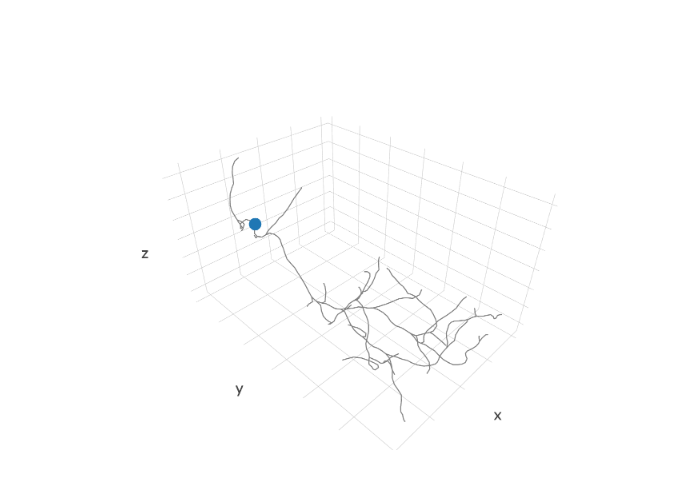

In [5]:
neuron = Neurons.downsample_nodes(neuron; nodeNumStep=24)
PlotRecipes.plot(neuron; nodeStep=1)

In [6]:
nodeDistanceList = Neurons.get_node_distance_list(neuron)
histogram(nodeDistanceList)

<!DOCTYPE html>
 
 
 Plots.jl

In [7]:
Neurons.get_total_path_length(neuron)

383426.2f0

In [8]:
branchingAngleList = map( i -> Neurons.get_branching_angle(neuron, i), 1:length(segmentList) )
p = histogram(branchingAngleList, leg=false)
xlabel!(p, "branching angle")
ylabel!(p, "count of branches")

<!DOCTYPE html>
 
 
 Plots.jl

In [9]:
radiusList = Vector{Float64}(5000:5000:120000)
@time shollNumList = Neurons.get_sholl_number_list(neuron, radiusList)
p = plot(radiusList./1000, shollNumList, line=([:path, :dot],2), leg=false, w=3)
xlabel!(p, "radius from soma (\u03BCm)")
ylabel!(p, "sholl number")

  0.029128 seconds (44.84 k allocations: 2.936 MiB)


┌ Warning: Skipped line arg [:path, :dot].
└ @ Plots /Users/jwu/.julia/packages/Plots/M1wcx/src/args.jl:790


<!DOCTYPE html>
 
 
 Plots.jl

In [10]:
segmentPathLengthList = Neurons.get_segment_path_length_list( neuron )
@time segmentOrderList = Neurons.get_segment_order_list( neuron )
plot( segmentPathLengthList./1000, segmentOrderList, line=[:scatter], leg=false, 
    xlabel="segment path length (\u03BCm)",
    ylabel="segment order")

  0.049113 seconds (103.65 k allocations: 5.612 MiB)


<!DOCTYPE html>
 
 
 Plots.jl

In [11]:
@time tortuosityList = map(Neurons.Segments.get_tortuosity, segmentList)
p = histogram(tortuosityList, leg=false)
xlabel!(p,"tortuosity")
ylabel!(p, "count of branches")

  0.089332 seconds (209.22 k allocations: 11.011 MiB)


<!DOCTYPE html>
 
 
 Plots.jl

In [12]:
p = plot(branchingAngleList, tortuosityList, leg=false, line=([:scatter], 3))
xlabel!(p, "branching angle")
ylabel!(p, "tortuosity")

<!DOCTYPE html>
 
 
 Plots.jl

In [13]:
averageRadiusList = map(b -> mean(Neurons.Segments.get_radius_list(b)), segmentList)
p = histogram(averageRadiusList, leg=false, nbins=100)
xlabel!(p, "average radius of a segment (nm)")
ylabel!(p, "count of branches")

LoadError: UndefVarError: mean not defined

In [14]:
@time path2RootLengthList = map(b -> Neurons.get_path_to_root_length(neuron, b;
                                                segmentPathLengthList=segmentPathLengthList), 1:length(segmentList))
p = histogram( path2RootLengthList./1000, leg=false, nbins=32)
xlabel!(p, "path to root length (\u03BCm)")
ylabel!(p, "count of branches")

  0.080099 seconds (105.25 k allocations: 5.676 MiB)


<!DOCTYPE html>
 
 
 Plots.jl

In [15]:
# identify spines
terminalSegmentIndexList = Neurons.get_terminal_segment_id_list(neuron)
terminalSegmentList = segmentList[ terminalSegmentIndexList ]
segmentPathLengthList = Neurons.get_segment_path_length_list( neuron )
terminalSegmentPathLengthList = segmentPathLengthList[ terminalSegmentIndexList ]
terminalSegmentTailHeadRadiusRatioList = map(Neurons.Segments.get_tail_head_radius_ratio, terminalSegmentList)

plot(terminalSegmentPathLengthList./1000, terminalSegmentTailHeadRadiusRatioList, line = ([:scatter],3), leg=false, 
        xlabel="terminal segment path length (\u03BCm)",
        ylabel="terminal segment tail-head-radius ratio",
        title="spine classifier")

<!DOCTYPE html>
 
 
 Plots.jl

In [16]:
# @time fractalDimension, radiusList, massList = Neuronss.get_fractal_dimension( Neurons )
# p = plot(log(radiusList), log(massList), line=([:scatter], 2), leg=false,
#         xlabel="log of radius",
#         ylabel="log of mass")